In [1]:
from decoder import *

In [2]:
import mobilenet
import keras.initializers.initializers_v2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers as KL
from tensorflow.keras import backend as K
from keras import models as KM
import tensorflow.keras.utils as KU

In [3]:
img_human = KL.Input(shape=(256, 256, 3))
img_anime = KL.Input(shape=(256, 256, 3))
styles = mobilenet.mobilenetv3_large(img_anime, scope="style")
styles = KL.GlobalAvgPool2D()(styles)
styles = KL.Flatten()(styles)
content = mobilenet.mobilenetv3_large(img_human, scope="content")
outputs = decoder(content, styles)
model = KM.Model(inputs=[img_human, img_anime], outputs=outputs)
model.summary()
KU.plot_model(model, expand_nested=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 contentConv (Conv2D)           (None, 128, 128, 16  432         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                            

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 contentConv (Conv2D)           (None, 128, 128, 16  432         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                            

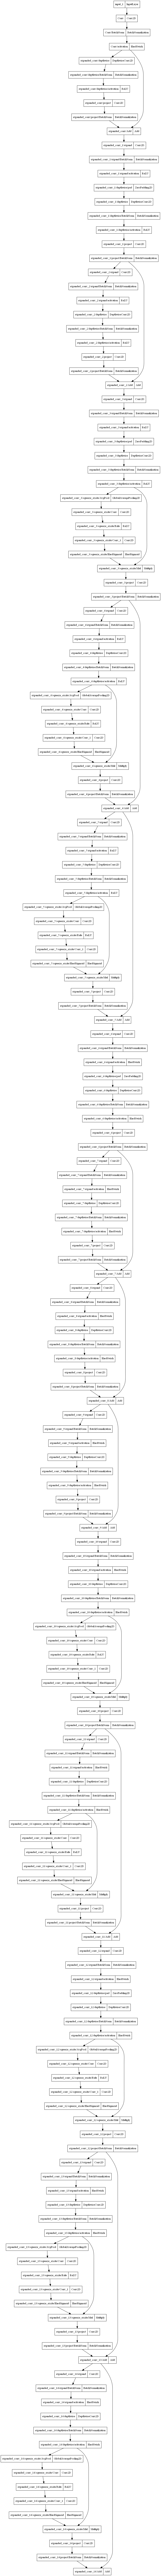

In [2]:
inputs = KL.Input(shape=(256, 256, 3))
outputs = mobilenet.mobilenetv3_large(inputs)
model = KM.Model(inputs, outputs)
KU.plot_model(model)